In [8]:
import pickle

import pandas as pd
import numpy as np
from sklearn.metrics import r2_score

import matplotlib.pyplot as plt

import datetime as dt
from macrosim.SeriesAccessor import SeriesAccessor

In [9]:
with open('./out.pkl', 'rb') as f:
    df = pickle.load(f)
for col in df.columns[:-1]:
    df[col] = df[col].apply(lambda x: x[0])
df

,CIVPART,RIMP,UNEMP,DOMINV,CPI,output
0,66.487783,-1.157417e+12,5.666712,1902.947312,2.773033,-2.626624e+12
1,66.692535,-1.260781e+12,5.850981,1972.051460,2.704505,-2.874913e+12
2,66.488890,-1.157952e+12,5.685016,1941.012570,2.547049,-2.643705e+12
3,66.567146,-1.196435e+12,5.683569,1966.241405,2.293399,-2.744663e+12
4,66.390816,-1.111466e+12,5.672262,1998.157071,2.172247,-2.560825e+12
5,66.479022,-2.310604e+12,5.663374,1848.258359,2.173665,-5.185242e+12
6,66.684071,-2.517112e+12,5.759833,2017.782063,2.122773,-5.806455e+12
7,66.475693,-2.309537e+12,5.616092,1939.053539,1.999318,-5.287470e+12
8,66.533675,-2.376256e+12,5.623081,2171.416614,1.801325,-5.607582e+12
9,66.382186,-2.218931e+12,5.582624,2115.167030,1.709160,-5.205859e+12


In [10]:
fred = SeriesAccessor(
    key_path='../fred_key.env',
    key_name='FRED_KEY'
)
start = dt.datetime.fromisoformat('2002-01-01')
end = dt.datetime.fromisoformat('2024-12-31')

act = fred.get_series(
    series_ids=['GDPC1'],
    series_alias=['RGDP'],
    date_range=(start, end)
)

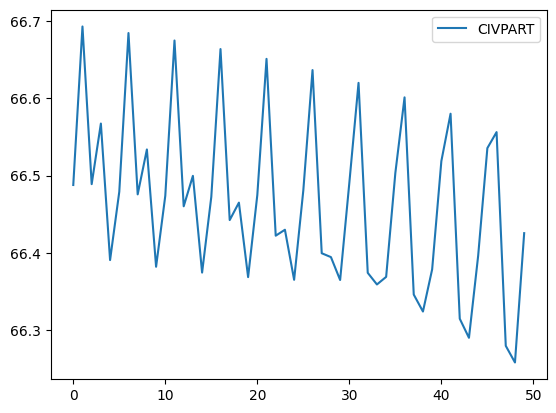

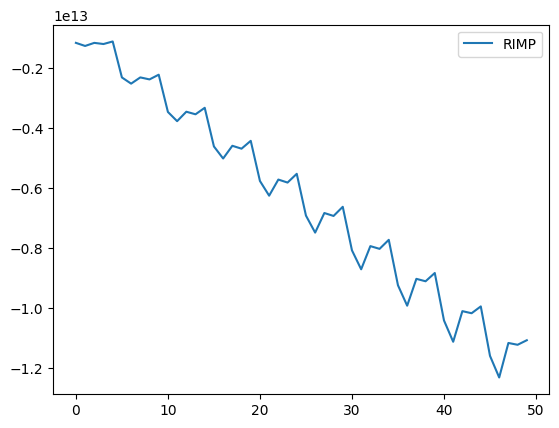

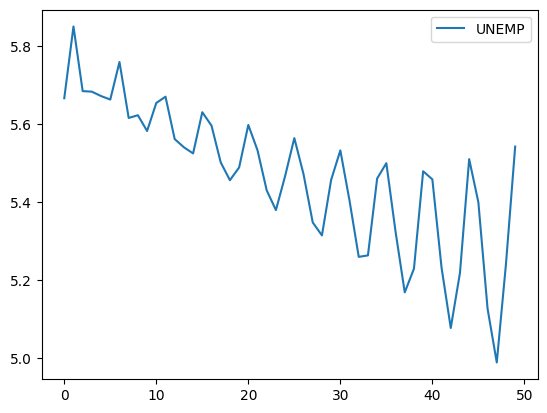

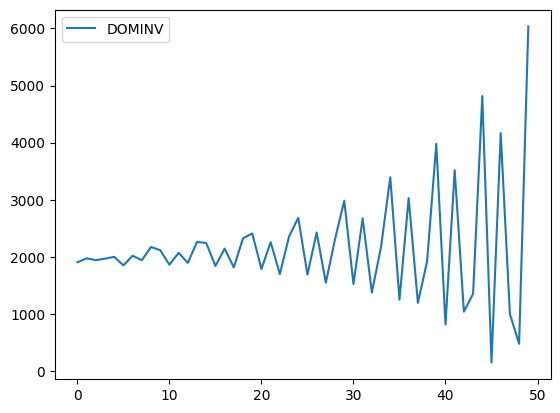

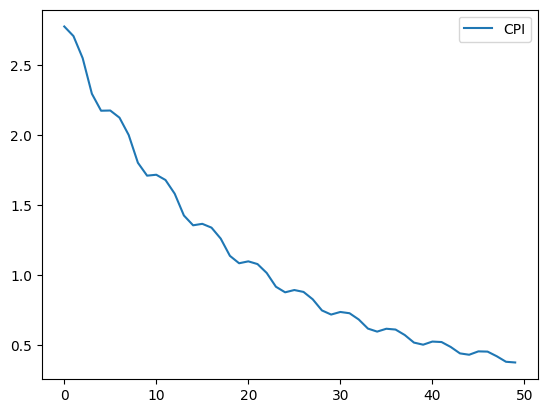

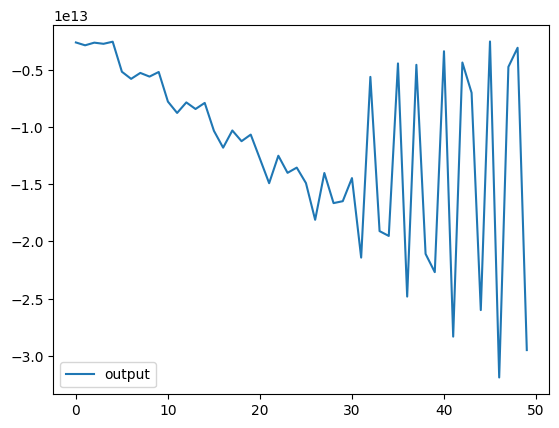

<Figure size 640x480 with 0 Axes>

In [11]:
for col in df.columns:
    plt.plot(df[col], label=col)
    plt.legend()
    plt.show()
plt.clf()

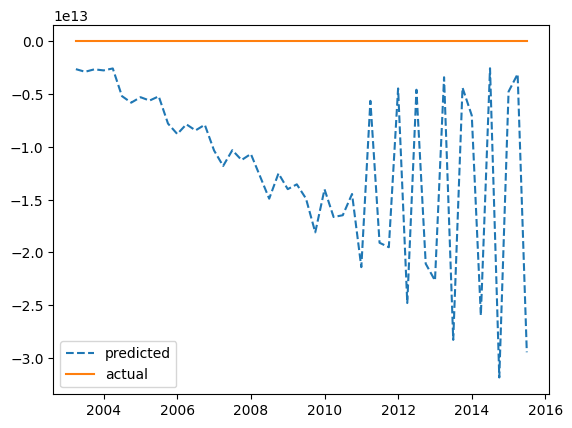

In [12]:
pred = df['output']
act = act.iloc[5:55]

pred.index = act.index

plt.plot(pred, label='predicted', linestyle='--')
plt.plot(act, label='actual')
plt.legend()

In [13]:
r2_score(act, pred)

-2.0408404836822142e+20

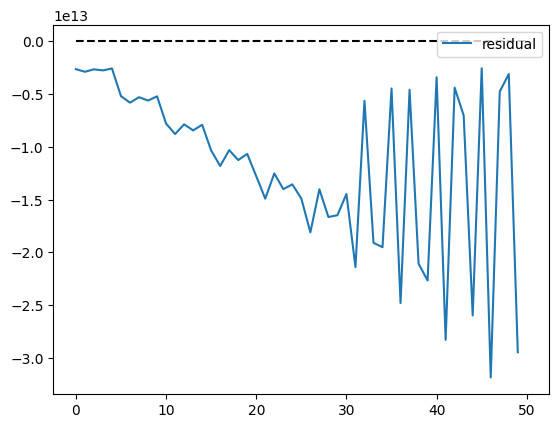

In [14]:
resid = (pred - act['RGDP']).reset_index(drop=True)
resid.plot(label='residual')
plt.hlines(0, 0, 50, linestyle='--', color='black')
plt.legend()
plt.show()